In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
% matplotlib inline

In [3]:
test = pd.read_csv('input/Crimes_-_2016.csv', 
                   header = 0,
                   nrows = 5000,
                   index_col = 'Date',
                   parse_dates = ['Date'])

In [72]:
from sklearn.decomposition import PCA
ct = pd.crosstab(test['Community Area'], test['Primary Type'])
pca = PCA(n_components = 2)
pca.fit(ct)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [86]:
components = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2'])

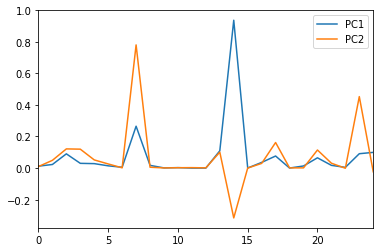

In [87]:
components.index = 
components.plot()

In [90]:
components['PC1'] **2 + components['PC2'] ** 2

0     2.378108e-04
1     2.911083e-03
2     2.286273e-02
3     1.522305e-02
4     3.456602e-03
5     8.816550e-04
6     2.859909e-05
7     6.789177e-01
8     3.209581e-04
9     1.721468e-06
10    1.266282e-05
11    7.118109e-06
12    1.779396e-06
13    2.212710e-02
14    9.765354e-01
15    1.009699e-07
16    2.151658e-03
17    3.200390e-02
18    1.488340e-06
19    1.758239e-04
20    1.730700e-02
21    1.245350e-03
22    2.113565e-05
23    2.131313e-01
24    1.043624e-02
dtype: float64

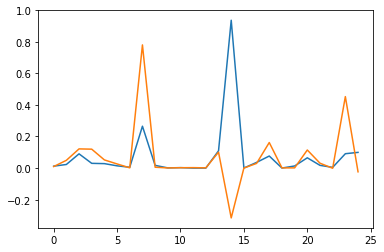

In [73]:
plt.plot(pca.components_.T)

In [74]:
ct2 = pca.transform(ct)

In [76]:
ct2.shape

(77, 2)

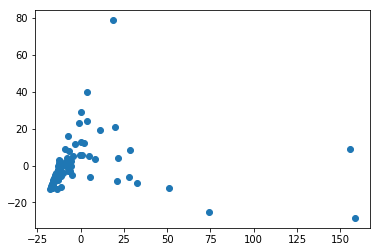

In [77]:
plt.scatter(ct2[:,0], ct2[:,1])

In [81]:
ct.columns

Index([u'ARSON', u'ASSAULT', u'BATTERY', u'BURGLARY', u'CRIM SEXUAL ASSAULT',
       u'CRIMINAL DAMAGE', u'CRIMINAL TRESPASS', u'DECEPTIVE PRACTICE',
       u'HOMICIDE', u'INTERFERENCE WITH PUBLIC OFFICER', u'INTIMIDATION',
       u'KIDNAPPING', u'LIQUOR LAW VIOLATION', u'MOTOR VEHICLE THEFT',
       u'NARCOTICS', u'OBSCENITY', u'OFFENSE INVOLVING CHILDREN',
       u'OTHER OFFENSE', u'PROSTITUTION', u'PUBLIC PEACE VIOLATION',
       u'ROBBERY', u'SEX OFFENSE', u'STALKING', u'THEFT',
       u'WEAPONS VIOLATION'],
      dtype='object', name=u'Primary Type')

In [6]:
# import folium
# from folium import plugins
# m = folium.Map([41.8781, -87.6298], zoom_start=11)
# m.add_child(plugins.HeatMap(crime_theft_pos, radius=0.1))
# m

In [44]:
crime_cat_pos = crimes_2016[['Primary Type', 'Latitude', 'Longitude']].dropna()
crime_theft_pos = crime_cat_pos.loc[crime_cat_pos['Primary Type'] == 'HOMICIDE', ['Latitude', 'Longitude']]
crime_theft_pos = np.array(crime_theft_pos)

In [310]:
nbin = 50
# H, xedge, yedge = np.histogram2d(crime_theft_pos[:,0], crime_theft_pos[:,1], bins=nbin)
H, xedge, yedge = np.histogram2d(crimes_2016['Latitude'], 
                                 crimes_2016['Longitude'],
                                 range = [[llcornerlat, urcornerlat],
                                          [llcornerlong, urcornerlong]],
                                 bins=nbin)
xedge = (xedge[:nbin] + xedge[1:nbin+1]) * 0.5
yedge = (yedge[:nbin] + yedge[1:nbin+1]) * 0.5

In [311]:
print xedge[0]
print xedge[-1]

41.6439
42.0261


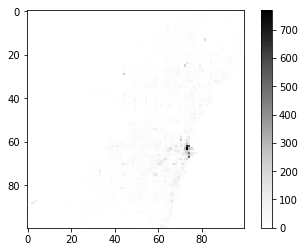

In [132]:
plt.imshow(H, cmap='Greys')
plt.colorbar()
plt.show()

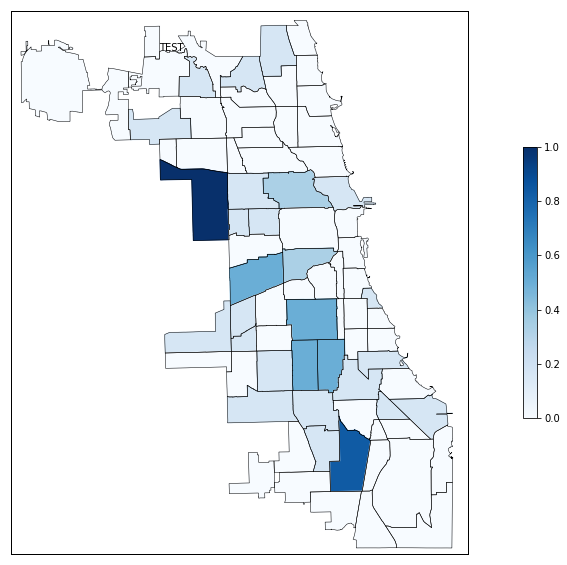

In [26]:
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
urcornerlat = 42.03
urcornerlong = -87.51
llcornerlat = 41.64
llcornerlong = -87.95

fig, ax = plt.subplots(figsize=(20, 10))

m = Basemap(projection='merc', resolution='c',
            llcrnrlat=llcornerlat, urcrnrlat=urcornerlat,
            llcrnrlon=llcornerlong, urcrnrlon=urcornerlong, ax=ax)
m.readshapefile('shapefiles/Community Areas/geo_export',
                         'communities')
# x, y = np.meshgrid(yedge,xedge)
# clevs = [0, 50, 100, 350, 800]
# cs = m.contourf(x,y,H, ax=ax, latlon=True, cmap='Blues')
# cbar = m.colorbar(cs,location='right',pad="5%")

ct = test.loc[test['Primary Type'] == 'HOMICIDE', 'Community Area'].value_counts()
vmin = 0
vmax = max(ct)
ct = (ct-vmin)/float(vmax-vmin)
colors = []
for shapedict in m.communities_info:
    colors.append(int(shapedict['area_numbe']))


from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
cmap = plt.cm.Blues
for idx, seg in enumerate(m.communities):
    if colors[idx] in ct:
        color = rgb2hex(cmap(ct[colors[idx]])[:3]) 
    else:
        color = rgb2hex(cmap(0)[:3]) 
    poly = Polygon(seg,facecolor=color,edgecolor=color)
    ax.add_patch(poly)
    plt.text(seg[0][0], seg[0][1], 'TEST')
ax, _ = mpl.colorbar.make_axes(plt.gca(), shrink=0.5)
cbar = mpl.colorbar.ColorbarBase(ax=ax, cmap = cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
# m.colorbar(mappable=m)
m.drawmapboundary()


plt.show()

In [1]:
import pickle
dic = pickle.load(open('input/community_name.p'))
dic[8]

'NEAR NORTH SIDE'

In [31]:
np.mean(seg, axis=0)

array([ 14910.36920818,  55002.71520692])

In [6]:
communities = m.communities_info
communities

[{'RINGNUM': 1,
  'SHAPENUM': 1,
  'area': 0.0,
  'area_num_1': '35',
  'area_numbe': '35',
  'comarea': 0.0,
  'comarea_id': 0.0,
  'community': 'DOUGLAS',
  'perimeter': 0.0,
  'shape_area': 46004621.1581,
  'shape_len': 31027.0545098},
 {'RINGNUM': 1,
  'SHAPENUM': 2,
  'area': 0.0,
  'area_num_1': '36',
  'area_numbe': '36',
  'comarea': 0.0,
  'comarea_id': 0.0,
  'community': 'OAKLAND',
  'perimeter': 0.0,
  'shape_area': 16913961.0408,
  'shape_len': 19565.5061533},
 {'RINGNUM': 1,
  'SHAPENUM': 3,
  'area': 0.0,
  'area_num_1': '37',
  'area_numbe': '37',
  'comarea': 0.0,
  'comarea_id': 0.0,
  'community': 'FULLER PARK',
  'perimeter': 0.0,
  'shape_area': 19916704.8692,
  'shape_len': 25339.0897503},
 {'RINGNUM': 1,
  'SHAPENUM': 4,
  'area': 0.0,
  'area_num_1': '38',
  'area_numbe': '38',
  'comarea': 0.0,
  'comarea_id': 0.0,
  'community': 'GRAND BOULEVARD',
  'perimeter': 0.0,
  'shape_area': 48492503.1554,
  'shape_len': 28196.8371573},
 {'RINGNUM': 1,
  'SHAPENUM': 5,

In [254]:
community_name = {}
for community in communities:
    community_name[int(community['area_numbe'])] = community['community']

In [255]:
community_name[8]

'NEAR NORTH SIDE'

In [238]:
delta_x = 0.01
latitude = 41.898863
longitude = - 87.637728
near_home = crimes_2016[crimes_2016.apply(lambda x: \
                                          (x['Longitude'] - longitude) ** 2 + (x['Latitude'] - latitude) ** 2 < delta_x ** 2,
                                          axis = 1)]

In [256]:
near_home['Community Area'].apply(lambda x: community_name[x]).value_counts()

NEAR NORTH SIDE    3745
WEST TOWN            27
NEW CITY              1
Name: Community Area, dtype: int64

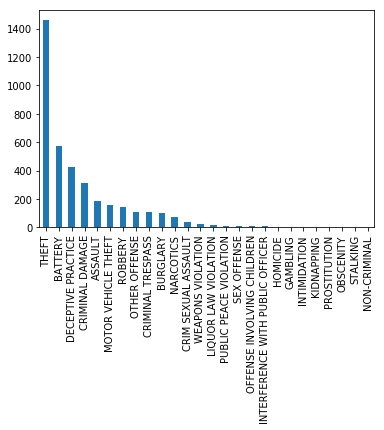

In [261]:
near_home['Primary Type'].value_counts().plot.bar()

In [262]:
near_home['Primary Type'].value_counts()


THEFT                               1459
BATTERY                              570
DECEPTIVE PRACTICE                   426
CRIMINAL DAMAGE                      314
ASSAULT                              185
MOTOR VEHICLE THEFT                  154
ROBBERY                              144
OTHER OFFENSE                        110
CRIMINAL TRESPASS                    108
BURGLARY                             104
NARCOTICS                             71
CRIM SEXUAL ASSAULT                   34
WEAPONS VIOLATION                     25
LIQUOR LAW VIOLATION                  13
PUBLIC PEACE VIOLATION                11
SEX OFFENSE                           11
OFFENSE INVOLVING CHILDREN            10
INTERFERENCE WITH PUBLIC OFFICER      10
HOMICIDE                               5
GAMBLING                               2
INTIMIDATION                           2
KIDNAPPING                             1
PROSTITUTION                           1
OBSCENITY                              1
STALKING        

In [272]:
from __future__ import division
near_home[near_home['Arrest'] == True].shape[0] / near_home.shape[0]

0.16220514179697854

In [277]:
homicide_2016 = crimes_2016[crimes_2016['Primary Type'] == 'THEFT']
homicide_2016[homicide_2016['Arrest'] == True].shape[0] / homicide_2016.shape[0]

0.10542824638387778

In [295]:
Burglary = crimes_2016[crimes_2016['Primary Type'] == 'BURGLARY']
robbery = crimes_2016[crimes_2016['Primary Type'] == 'ROBBERY']

In [298]:
vehicle = crimes_2016[crimes_2016['Primary Type'] == 'MOTOR VEHICLE THEFT']